Original Shape: (51290, 24)


,ï»¿Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"$2,309.65",7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,311.5200,903.04,Critical


/tmp/ipython-input-2010109550.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2010109550.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Cleaned Shape: (47476, 24)

: Statistical Summary:


,mean,median,std,var
ï»¿Row ID,25272.446499,24778.50,14970.164716,2.241058e+08
Postal Code,57569.344964,56430.50,11594.108406,1.344233e+08
Quantity,3.294317,3.00,2.029143,4.117420e+00
Discount,0.141530,0.00,0.208058,4.328811e-02
Profit,21.140038,8.76,84.833376,7.196702e+03
Shipping Cost,19.213178,7.36,29.710889,8.827369e+02



: Correlation Matrix:


,ï»¿Row ID,Postal Code,Quantity,Discount,Profit,Shipping Cost
ï»¿Row ID,1.000000,0.073160,-0.208976,0.089096,-0.040458,-0.070015
Postal Code,0.073160,1.000000,0.018126,-0.055538,0.014759,-0.000350
Quantity,-0.208976,0.018126,1.000000,-0.028706,0.114532,0.256866
Discount,0.089096,-0.055538,-0.028706,1.000000,-0.444958,-0.103393
Profit,-0.040458,0.014759,0.114532,-0.444958,1.000000,0.370026
Shipping Cost,-0.070015,-0.000350,0.256866,-0.103393,0.370026,1.000000


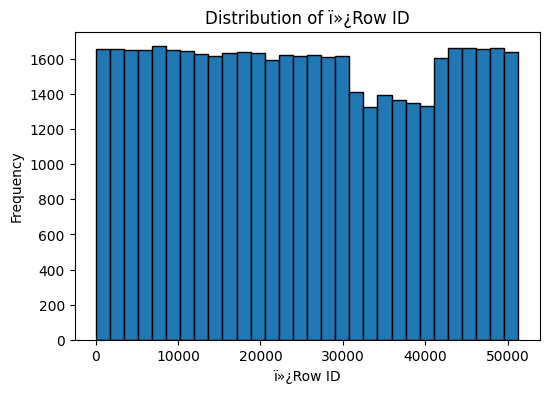

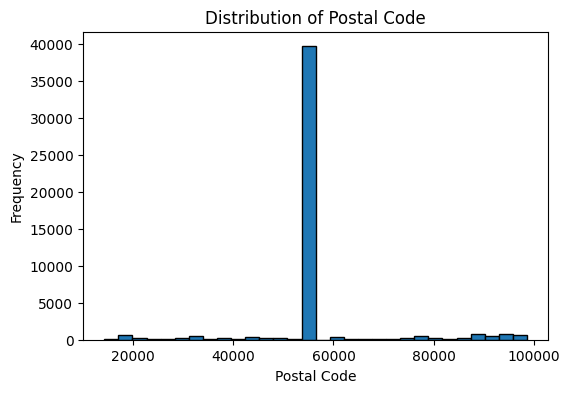

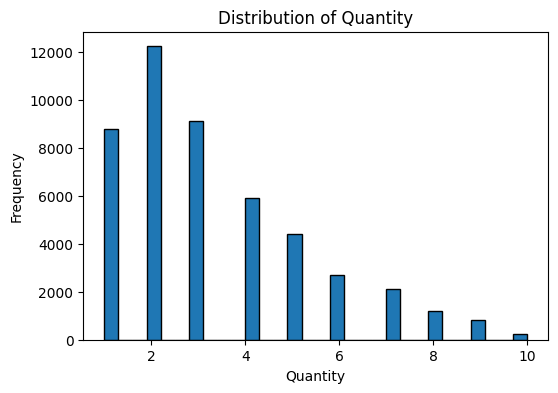

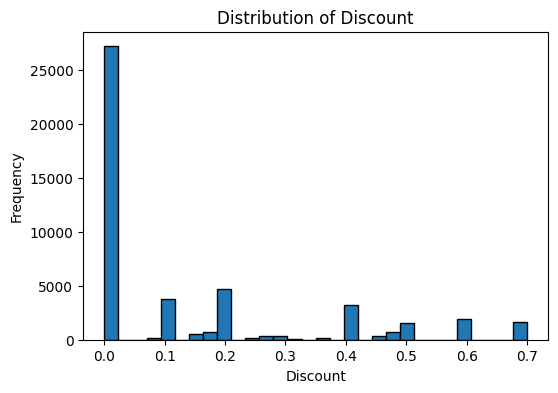

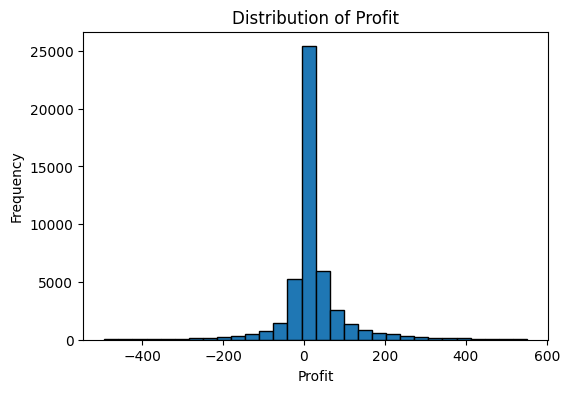

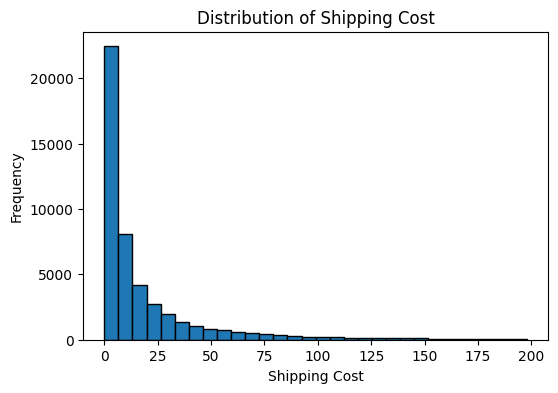

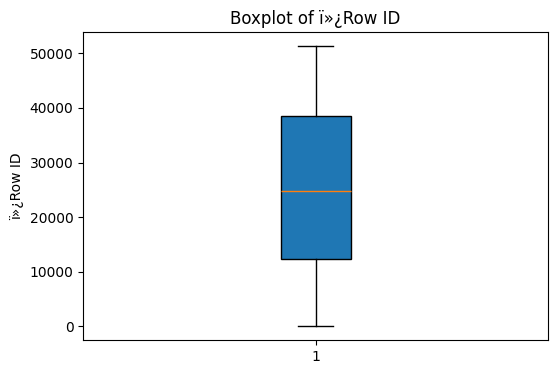

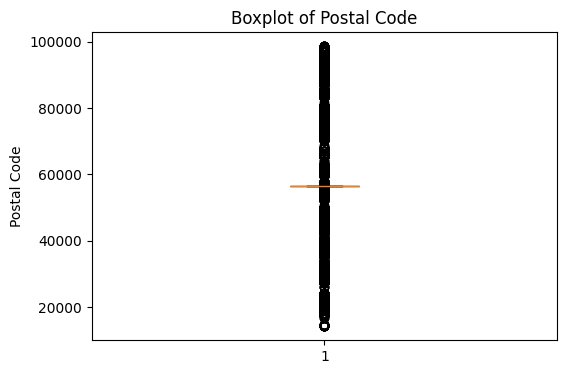

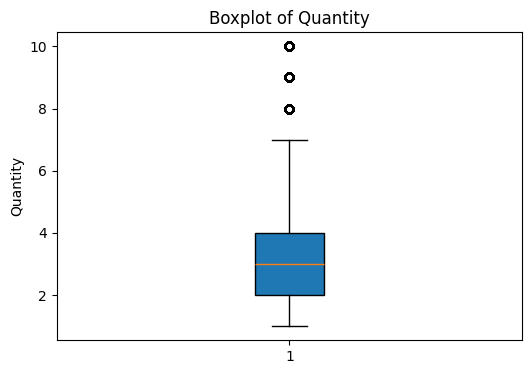

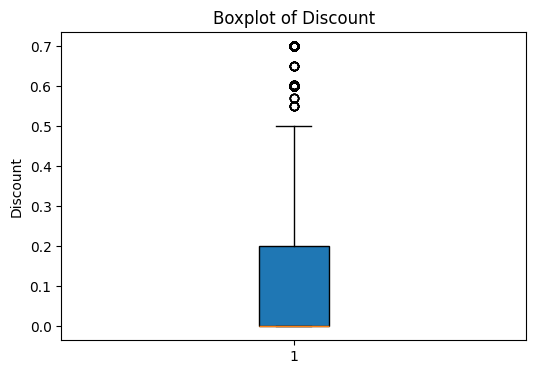

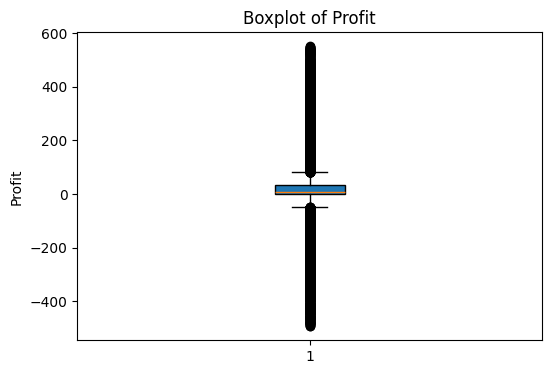

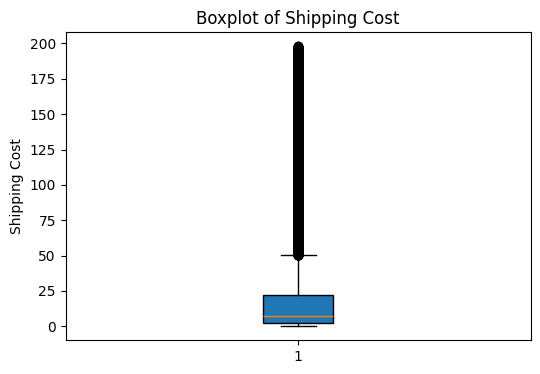

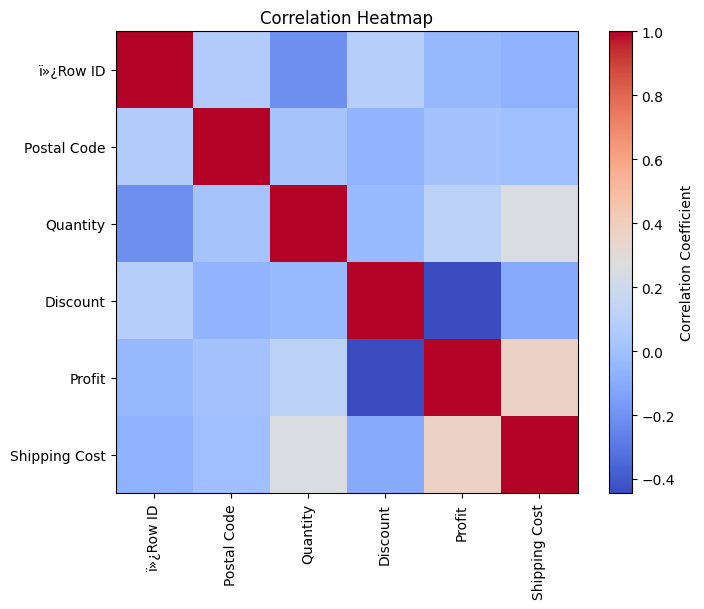

TASK-2 COMLETED


In [36]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#upload dataset
df = pd.read_csv("/content/drive/MyDrive/GlobalSuperstore Data.csv", encoding="latin1")   # <- change file name if needed
print("Original Shape:", df.shape)
display(df.head())

#DATA CLEANING

# Handle Missing Values
#here cols =columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# output duplicates
df.drop_duplicates(inplace=True)

#  Using Z-score method to remove outliers
numeric_df = df[num_cols]
z_scores = np.abs(stats.zscore(numeric_df))
df = df[(z_scores < 3).all(axis=1)]


print("Cleaned Shape:", df.shape)

# 3.  Analysis
stats_summary = df[num_cols].agg(['mean','median','std','var']).T
print("\n: Statistical Summary:")
display(stats_summary)

# mean ,median,std,var in matrix
corr = df[num_cols].corr()
print("\n: Correlation Matrix:")
display(corr)


# 3. Data Visualization

# Histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# Heatmap (correlation)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()

print("TASK-2 COMLETED")